In [1]:
import pickle 
import numpy as np
import cv2 as cv
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D

In [2]:
feature_list=np.array(pickle.load(open('Resnet_featureextraction.pkl','rb')))
filenames=pickle.load(open('image_path.pkl','rb'))

In [3]:
Resnet50=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [4]:
Resnet50.trainable=False

In [5]:
model=Sequential()
model.add(Resnet50)
model.add(GlobalMaxPooling2D())

In [6]:
import cv2 as cv
import numpy as np
from numpy.linalg import norm
def feature_extraction(path,model):
    img=cv.imread(path)
    img_array=cv.resize(img,(224,224))
    img=np.expand_dims(img_array,axis=0)
    preprocessed_img=preprocess_input(img)
    result=model.predict(preprocessed_img).flatten()
    normalized_output=result/norm(result)
    return normalized_output

In [7]:
# taking random image for the dataset
image_feature=feature_extraction(r"C:\Users\bisht\Downloads\OIP (2).jpeg",model)

1/1 [==============================] - 1s 965ms/step


In [8]:
from sklearn.neighbors import NearestNeighbors

In [9]:
w

In [10]:
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [11]:
distance,indices=neighbors.kneighbors([image_feature])

In [12]:
indices=indices

In [13]:
import matplotlib.pyplot as plt

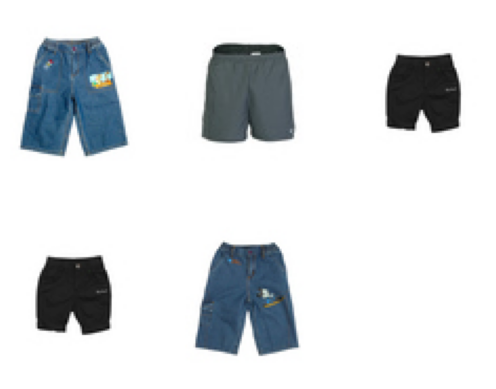

In [14]:
for i,file in enumerate(indices[0]):
    plt.subplot(2,3,i+1)
    img=plt.imread(filenames[file])
    plt.imshow(img)
    plt.axis('off')

(-0.5, 473.5, 473.5, -0.5)

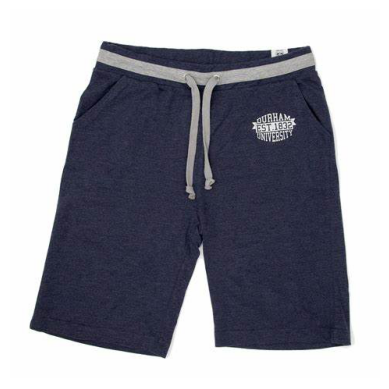

In [15]:
img=plt.imread(r"C:\Users\bisht\Downloads\OIP (2).jpeg")
plt.imshow(img)
plt.axis('off')

In [16]:
shirt_feature=feature_extraction(r"C:\Users\bisht\Downloads\erc2nt3m.png",model)

1/1 [==============================] - 0s 94ms/step


In [17]:
distance,indices=neighbors.kneighbors([shirt_feature])

In [18]:
indices

array([[30990,  3222,  6108,  3848, 29943]], dtype=int64)

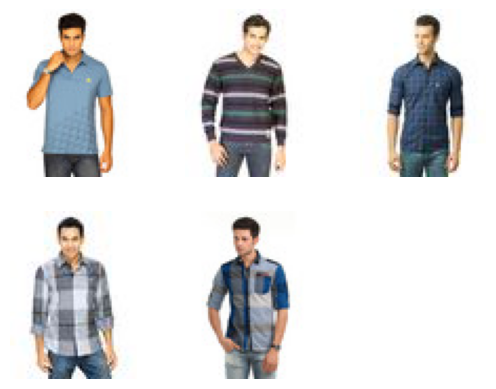

In [19]:
for i,file in enumerate(indices[0]):
    plt.subplot(2,3,i+1)
    image=plt.imread(filenames[file])
    plt.imshow(image)
    plt.axis('off')
    

In [20]:
from keras.models import load_model
model.save('ResnetModel.h5')

C:\Users\bisht\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ValueError: operands could not be broadcast together with shapes (22221,2048) (22220,2048) 

(44441, 2048)